In [1]:
import ROOT
fin = ROOT.TFile.Open("../../outputs/rootfiles/modules/ch2mu2eTrEff_pteta.root","Read")

S1 = "mXX-100_mA-0p25_lxy-300"
S2 = "mXX-500_mA-0p25_lxy-300"
S3 = "mXX-500_mA-1p2_lxy-300"
S4 = "mXX-1000_mA-5_lxy-300"

stest = S3

ch = ["2mu2e","4mu"]

samples = [S1, S2, S3, S4]
colors = [1,2,3,4,5,6,7]
markers = [24,25,26,32,27]

Welcome to JupyROOT 6.12/07


## As a test this shows the number of gen muons

Info in <TCanvas::Print>: pdf file nbout/n_gen_muons.pdf has been created


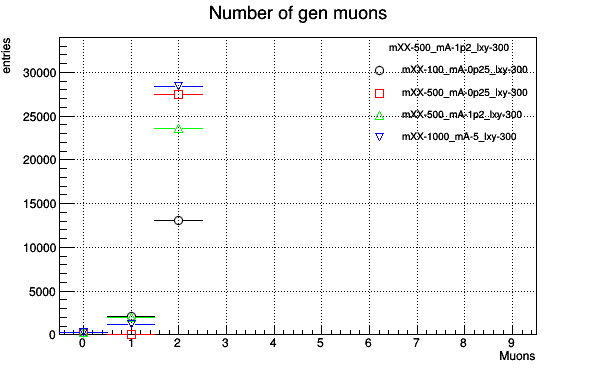

In [2]:
Yeah

The vast majority of events has 2 gen muons. <br>
The two muons coming from the dark photon

## From here on, only events with two gen muons are used. <br>
### Number of dsa and pf muons

Warning in <TCanvas::Constructor>: Deleting canvas with same name: can
Info in <TCanvas::Print>: pdf file nbout/n_reco_muons.pdf has been created


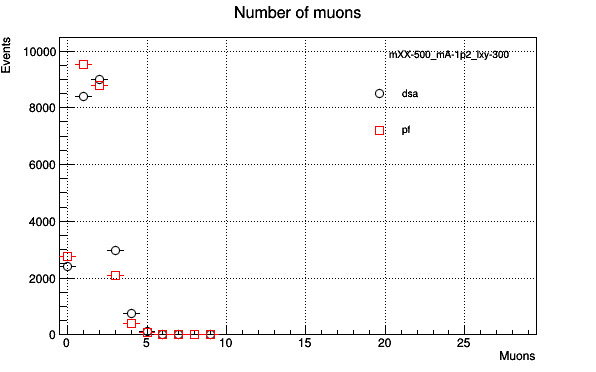

In [3]:
can = ROOT.TCanvas("can","can", 600, 400)
can.SetGrid(1,1)
can.cd()
leg = ROOT.TLegend (.6, .6, .9, .9)
leg.SetHeader(S3, "C")
leg.SetBorderSize(0)
leg.SetFillStyle(0)

htod = ["ndsa", "npf"]

maxb = 0
for i, h in enumerate(htod):
    hist = fin.Get("ch" + ch[0] + "/sig/" + stest + "/" + h)
    maxy = hist.GetBinContent(hist.GetMaximumBin())
    if maxy > maxb:
        maxb = maxy

for i,h in enumerate(htod):
    hist = fin.Get("ch" + ch[0] + "/sig/" + stest + "/" + h) 
    hist.SetStats(0)
    hist.SetAxisRange(0., maxb + maxb*0.1,"Y")
    hist.SetLineColor(colors[i])
    hist.SetMarkerColor(colors[i])
    hist.SetMarkerStyle(markers[i])
    hist.SetTitle("Number of muons; Muons; Events")
    leg.AddEntry(hist, h[1:], "p")
    hist.Draw("same")

leg.Draw()
can.Draw()
#can.SaveAs('n_gen_muons.png')
can.SaveAs('nbout/n_reco_muons.pdf')

Using pt cuts of 5 (10) for pf (dsa) muons get rid of all events with >15 muons. <br>
The number of events is now ~50,000. <br>

### Number of muons in each sample

Warning in <TCanvas::Constructor>: Deleting canvas with same name: can


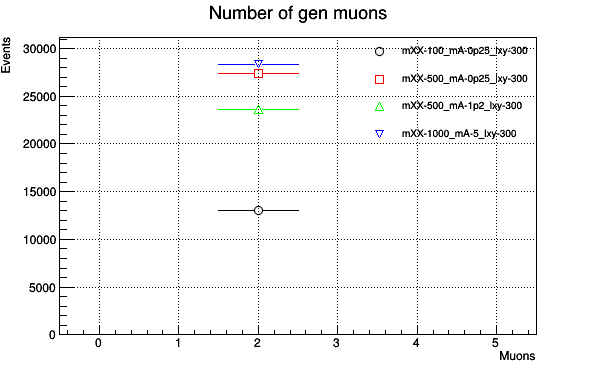

In [4]:
can = ROOT.TCanvas("can", "can", 600, 400)
can.SetGrid(1,1)
can.cd()
leg = ROOT.TLegend (.6, .6, .9, .9)
#leg.SetHeader("C")
leg.SetBorderSize(0)
leg.SetFillStyle(0)

htod = "ngen"

maxb = 0
for j, sam in enumerate(samples):
    hist = fin.Get("ch" + ch[0] + "/sig/" + sam + "/" + htod)
    maxy = hist.GetBinContent(hist.GetMaximumBin())
    if maxy > maxb:
        maxb = maxy
            
for j, sam in enumerate(samples):
    hist = fin.Get("ch" + ch[0] + "/sig/" + sam + "/" + htod)
    hist.SetStats(0)
    hist.SetAxisRange(0., 5.,"X")
    hist.SetAxisRange(0., maxb + maxb*0.1,"Y")
    hist.SetLineColor(colors[j])
    hist.SetMarkerColor(colors[j])
    hist.SetMarkerStyle(markers[j])
    hist.SetTitle("Number of " + str(htod[1:]) + " muons; Muons; Events")
    leg.AddEntry(hist, sam, "p")
    hist.Draw("same")
leg.Draw("same")
can.Draw()

Gen muons

### $\Delta R$ for the 2 gen muons

Warning in <TCanvas::Constructor>: Deleting canvas with same name: can
Info in <TCanvas::Print>: pdf file nbout/dR_gen_muons.pdf has been created


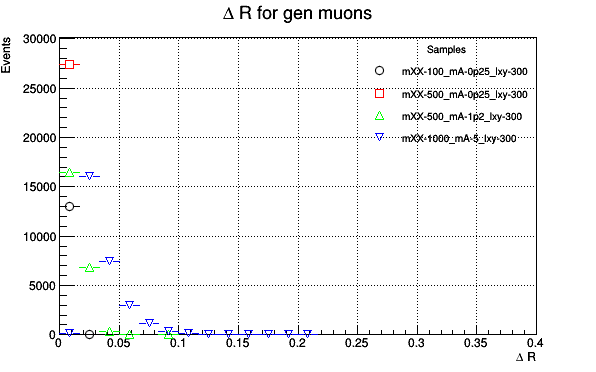

In [5]:
can = ROOT.TCanvas("can","can", 600, 400)
can.SetGrid(1,1)
can.cd()
leg = ROOT.TLegend (.6, .6, 0.9, .9)
leg.SetHeader("Samples", "C")
leg.SetBorderSize(0)
leg.SetFillStyle(0)

htod = "gen_dR"

maxb = 0
for j, sam in enumerate(samples):
    hist = fin.Get("ch" + ch[0] + "/sig/" + sam + "/" + htod)
    maxy = hist.GetBinContent(hist.GetMaximumBin())
    if maxy > maxb:
        maxb = maxy

for i,sam in enumerate(samples):
    hist = fin.Get("ch" + ch[0] + "/sig/" + sam + "/" + htod) 
    hist.SetStats(0)
    hist.SetAxisRange(0., maxb + maxb*0.1,"Y")
    hist.SetLineColor(colors[i])
    hist.SetMarkerColor(colors[i])
    hist.SetMarkerStyle(markers[i])
    hist.SetTitle("#Delta R for gen muons; #Delta R; Events")
    leg.AddEntry(hist, sam, "p")
    hist.Draw("same")

leg.Draw()
can.Draw()
can.SaveAs('nbout/dR_gen_muons.pdf')

$\Delta R$ for gen muons follow trends seems before

### Invariant mass of the gen muons

Warning in <TCanvas::Constructor>: Deleting canvas with same name: can


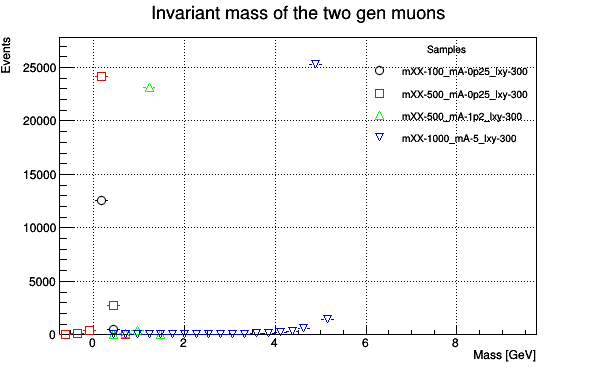

In [6]:
can = ROOT.TCanvas("can","can", 600, 400)
can.SetGrid(1,1)
can.cd()
leg = ROOT.TLegend (.6, .6, 0.9, .9)
leg.SetHeader("Samples", "C")
leg.SetBorderSize(0)
leg.SetFillStyle(0)

maxb = 0
for j, sam in enumerate(samples):
    hist = fin.Get("ch" + ch[0] + "/sig/" + sam + "/gen_Mass")
    maxy = hist.GetBinContent(hist.GetMaximumBin())
    if maxy > maxb:
        maxb = maxy


for i,sam in enumerate(samples):
    hist = fin.Get("ch" + ch[0] + "/sig/" + sam + "/gen_Mass") 
    hist.SetStats(0)
    hist.SetAxisRange(0., maxb + maxb*0.1,"Y")
    hist.SetLineColor(colors[i])
    hist.SetMarkerColor(colors[i])
    hist.SetMarkerStyle(markers[i])
    hist.SetTitle("Invariant mass of the two gen muons; Mass [GeV]; Events")
    leg.AddEntry(hist, sam, "p")
    hist.Draw("same")

leg.Draw()
can.Draw()

### $p_{T}$ distibutions of gen muons

Warning in <TCanvas::Constructor>: Deleting canvas with same name: can
Info in <TCanvas::Print>: pdf file nbout/pT_gen_muons.pdf has been created


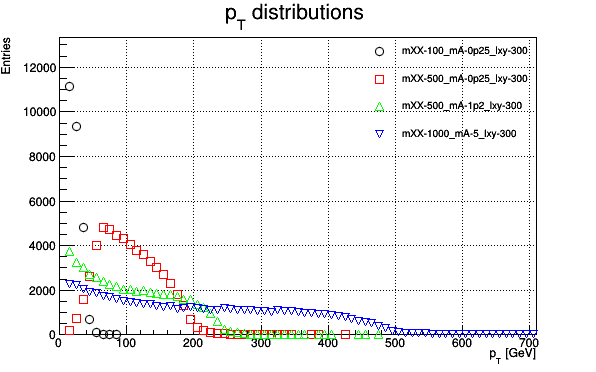

In [7]:
can = ROOT.TCanvas("can", "can", 600, 400)
can.SetGrid(1,1)
can.cd()
leg = ROOT.TLegend (.6, .6, .9, .9)
#leg.SetHeader("C")
leg.SetBorderSize(0)
leg.SetFillStyle(0)
    
maxb = 0
for j, sam in enumerate(samples):
    hist = fin.Get("ch" + ch[0] + "/sig/" + sam + "/gen_pT")
    maxy = hist.GetBinContent(hist.GetMaximumBin())
    if maxy > maxb:
        maxb = maxy
            
for j, sam in enumerate(samples):
    hist = fin.Get("ch" + ch[0] + "/sig/" + sam + "/gen_pT")
    hist.SetStats(0)
    hist.SetAxisRange(0., 700,"X")
    hist.SetAxisRange(0., maxb + maxb*0.2,"Y")
    hist.SetLineColor(colors[j])
    hist.SetMarkerColor(colors[j])
    hist.SetMarkerStyle(markers[j])
    hist.SetTitle("p_{T} distributions ")
    leg.AddEntry(hist, sam, "p")
    hist.Draw("same")
leg.Draw("same")
can.Draw()
can.SaveAs('nbout/pT_gen_muons.pdf')

The bigger the dark photon mass the higher the pt of the muons.

### $p_{T}$ for the three collections, gen, pf, and dsa

Info in <TCanvas::Print>: pdf file nbout/pT_all_muons.pdf has been created


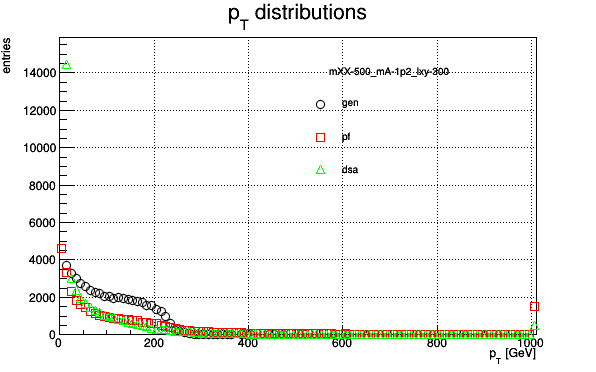

In [8]:
cnm = ROOT.TCanvas("cnm","cnm", 600, 400)
cnm.SetGrid(1,1)
cnm.cd()
leg = ROOT.TLegend (.5, .5, 0.8, .85)
leg.SetHeader(S3, "C")
leg.SetBorderSize(0)
leg.SetFillStyle(0)

htod = ["gen_pT","pf_pT","dsa_pT"]

maxb = 0
for i, h in enumerate(htod):
    hist = fin.Get("ch" + ch[0] + "/sig/" + stest + "/" + h)
    maxy = hist.GetBinContent(hist.GetMaximumBin())
    if maxy > maxb:
        maxb = maxy


for i,h in enumerate(htod):
    hist = fin.Get("ch" + ch[0] + "/sig/" + stest + "/" + h)
    hist.SetStats(0)
    hist.SetAxisRange(0., maxb + maxb*0.1,"Y")
    hist.SetAxisRange(0., 1000.,"X")
    hist.SetLineColor(colors[i])
    hist.SetMarkerColor(colors[i])
    hist.SetMarkerStyle(markers[i])
    hist.SetTitle("p_{T} distributions; p_{T} [GeV]; entries")
    leg.AddEntry(hist, h[:-3], "p")
    hist.Draw("same")

leg.Draw()
cnm.Draw()
cnm.SaveAs('nbout/pT_all_muons.pdf')

For gen muons the highest pt is ~550 GeV, while for pf and dsa it reaches up to 700 <br>
All distributions follow the same trend

### Matching gen muons to reco muons <br>
Now for the two reco muons matched to the gen muons.<br>
A reco muon is matched to a gen muon if: <br> 1. $\Delta R (gen,reco) <0.4$ <br> 2. $0.9 * p_{T}^{gen} < p_{T}^{reco} < 1.1 * p_{T}^{gen}$ 

Warning in <TCanvas::Constructor>: Deleting canvas with same name: cnm


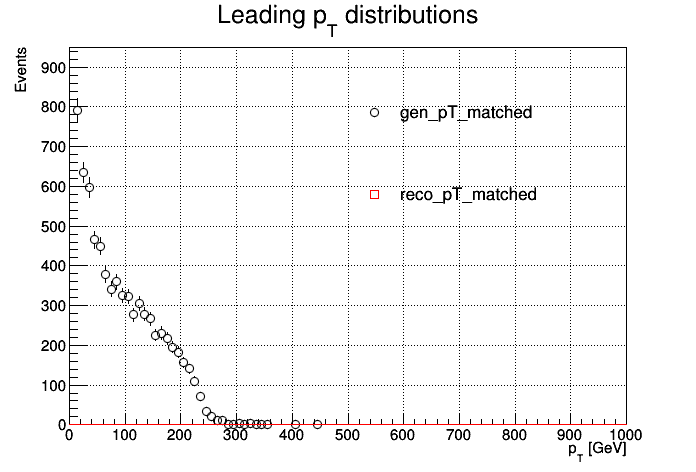

In [9]:
cnm = ROOT.TCanvas("cnm","cnm")
cnm.SetGrid(1,1)
cnm.cd()
leg = ROOT.TLegend (.5, .5, 0.8, .85)
leg.SetBorderSize(0)
leg.SetFillStyle(0)

htod = ["lgen_pT_matched","lreco_pT_matched"]

maxb = 0
for i, h in enumerate(htod):
    hist = fin.Get("ch" + ch[0] + "/sig/" + stest + "/" + h)
    maxy = hist.GetBinContent(hist.GetMaximumBin())
    if maxy > maxb:
        maxb = maxy

for i,h in enumerate(htod):
    hist = fin.Get("ch" + ch[0] + "/sig/" + stest + "/" + h)
    hist.SetAxisRange(0., maxb+ 0.2*maxb,"Y")
    hist.SetStats(0)
    hist.SetLineColor(colors[i])
    hist.SetMarkerColor(colors[i])
    hist.SetMarkerStyle(markers[i])
    hist.SetTitle("Leading p_{T} distributions; p_{T} [GeV]; Events")
    leg.AddEntry(hist, h[1:], "p")
    hist.Draw("same")

leg.Draw()
cnm.Draw()
#cnm.SaveAs('_muons.png')

### First look at an efficiency.

# $\epsilon = \frac{\text{Events with both gen reco muons matched to gen muons}}{\text{Total events with 2 gen muons}}$
<br>

Warning in <TCanvas::Constructor>: Deleting canvas with same name: cnm
Info in <TCanvas::Print>: pdf file nbout/matchig_pT_hists.pdf has been created


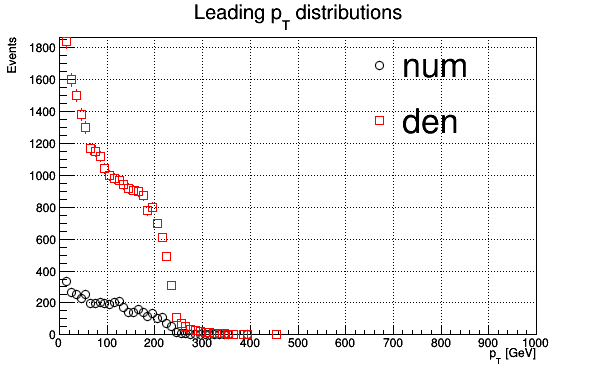

In [10]:
cnm = ROOT.TCanvas("cnm","cnm", 600, 400)
cnm.SetGrid(1,1)
cnm.cd()
leg = ROOT.TLegend (.6, .6, .9, .9)
leg.SetBorderSize(0)
leg.SetFillStyle(0)

htod = ["eff_num", "eff_den"]

maxb = 0
for i, h in enumerate(htod):
    hist = fin.Get("ch" + ch[0] + "/sig/" + stest + "/" + h)
    maxy = hist.GetBinContent(hist.GetMaximumBin())
    if maxy > maxb:
        maxb = maxy

for i,h in enumerate(htod):
    hist = fin.Get("ch" + ch[0] + "/sig/" + stest + "/" + h)
    hist.SetAxisRange(0., maxb+ 25.,"Y")
    hist.SetStats(0)
    hist.SetLineColor(colors[i])
    hist.SetMarkerColor(colors[i])
    hist.SetMarkerStyle(markers[i])
    hist.SetTitle("Leading p_{T} distributions; p_{T} [GeV]; Events")
    leg.AddEntry(hist, h[4:], "p")
    hist.Draw("same")

leg.Draw()
cnm.Draw()
cnm.SaveAs('nbout/matchig_pT_hists.pdf')

Distributions used to calculate efficiencies.

Info in <TCanvas::Print>: pdf file nbout/matching_eff_pT.pdf has been created


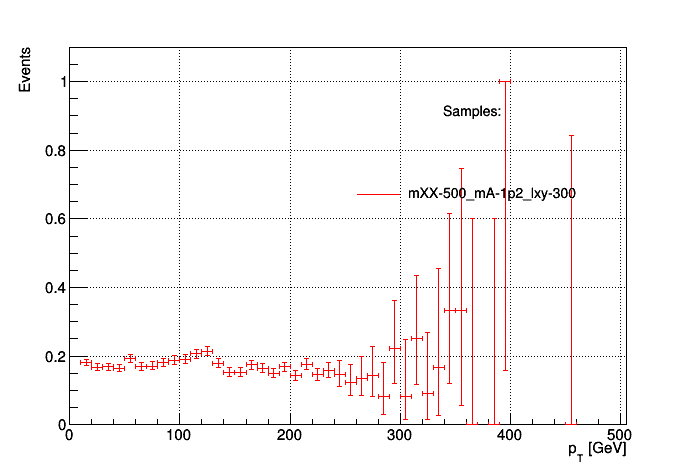

In [11]:
leg1 = ROOT.TLegend (.5, .5, 0.85, .85)
leg1.SetHeader("Samples:","C");
leg1.SetBorderSize(0)
leg1.SetFillStyle(0)

cx = ROOT.TCanvas("cx","cx")
cx.SetGrid(1,1)
cx.cd()

num = fin.Get("ch" + ch[0] + "/sig/" + stest + "/" + "eff_num")
den = fin.Get("ch" + ch[0] + "/sig/" + stest + "/" + "eff_den")
num.SetTitle(" ; p_{T} [GeV]; Efficiency")
eff = ROOT.TEfficiency(num, den)
eff.SetLineColor(ROOT.kRed)
eff.SetMarkerColor(ROOT.kRed)
leg1.AddEntry(eff, S3, "l")
eff.Draw()

leg1.Draw()
cx.Draw()
cx.SaveAs('nbout/matching_eff_pT.pdf')

Really low efficiencies. Probably the requirement of $p_{T}$ is an overkill

### Now trigger efficiency<br>
Definition:
# $\epsilon = \frac{\text{Events with both reco muons matched to trigger objects}}{\text{Event with one muon matched to trigger object}}$<br>

Warning in <TCanvas::Constructor>: Deleting canvas with same name: cnm
Info in <TCanvas::Print>: pdf file nbout/Treff_pT_hists.pdf has been created


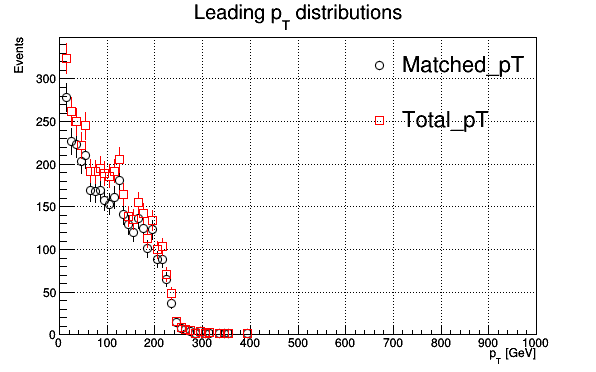

In [12]:
cnm = ROOT.TCanvas("cnm","cnm", 600, 400)
cnm.SetGrid(1,1)
cnm.cd()
leg = ROOT.TLegend (.6, .6, .9, .9)
leg.SetBorderSize(0)
leg.SetFillStyle(0)

htod = ["Matched_pT", "Total_pT"]

maxb = 0
for i, h in enumerate(htod):
    hist = fin.Get("ch" + ch[0] + "/sig/" + stest + "/" + h)
    maxy = hist.GetBinContent(hist.GetMaximumBin())
    if maxy > maxb:
        maxb = maxy

for i,h in enumerate(htod):
    hist = fin.Get("ch" + ch[0] + "/sig/" + stest + "/" + h)
    hist.SetAxisRange(0., maxb+ 25.,"Y")
    hist.SetStats(0)
    hist.SetLineColor(colors[i])
    hist.SetMarkerColor(colors[i])
    hist.SetMarkerStyle(markers[i])
    hist.SetTitle("Leading p_{T} distributions; p_{T} [GeV]; Events")
    leg.AddEntry(hist, h[:], "p")
    hist.Draw("same")

leg.Draw()
cnm.Draw()
cnm.SaveAs('nbout/Treff_pT_hists.pdf')

Distributions used to calculate efficiencies

Warning in <TCanvas::Constructor>: Deleting canvas with same name: cx
Info in <TCanvas::Print>: pdf file nbout/Treff_pT.pdf has been created


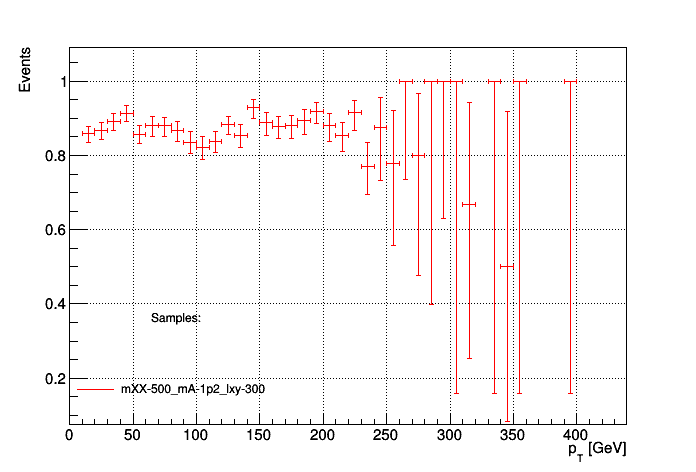

In [14]:
leg1 = ROOT.TLegend (.1, .1, .4, .4)
leg1.SetHeader("Samples:","C");
leg1.SetBorderSize(0)
leg1.SetFillStyle(0)

cx = ROOT.TCanvas("cx","cx")
cx.SetGrid(1,1)
cx.cd()

num = fin.Get("ch" + ch[0] + "/sig/" + stest + "/" + "Matched_pT")
den = fin.Get("ch" + ch[0] + "/sig/" + stest + "/" + "Total_pT")
num.SetTitle(" ; p_{T} [GeV]; Efficiency")
eff = ROOT.TEfficiency(num, den)
eff.SetLineColor(ROOT.kRed)
eff.SetMarkerColor(ROOT.kRed)
leg1.AddEntry(eff, S3, "l")
eff.Draw()

leg1.Draw()
cx.Draw()
cx.SaveAs('nbout/Treff_pT.pdf')

Some kind of turn-on for $p_{T} < 50$, but if then goes up and down again a couples time